<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_8/P8_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1
Para el siguiente sistema y despreciando la variación de energía y potencial. Determinar:

a) $\Delta S_u$     
b) $\eta_{ex}$ del proceso      
c) $\eta_{iso}$ turbina y $\eta_{ex}$ turbina    

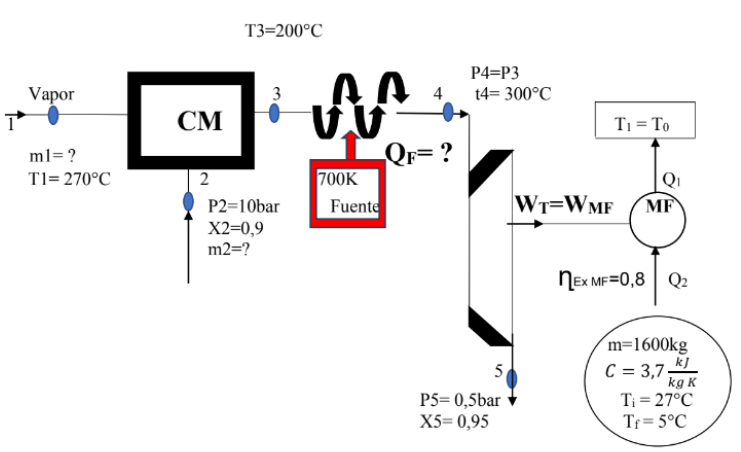

$T_0 = 300 \; \mathrm{K}$    
$P_0 = 1 \; \mathrm{bar}$

## Solución

In [1]:
# Datos:
T_1 = 270 + 273 # [K]
P_1 = P_2 = P_3 = P_4 = 10e5 # [Pa]
x_2 = 0.9
T_3 = 200 + 273 # [K]
T_F = 700 # [K]
P_5 = 0.5e5 # [Pa]
x_5 = 0.95
T_4 = 300 + 273 # [K]
T_0 = T_F1 = 300 # [K]
m = 1600 # [kg]
c = 3.7e3 # [J/(kg·K)]
T_i = 27 + 273 # [K]
T_f = 5 + 273 # [K]
η_exMF = 0.8

In [2]:
import numpy as np

In [3]:
!pip install CoolProp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 25.2 MB/s eta 0:00:00


In [4]:
import CoolProp.CoolProp as cp

---
### Máquina frigorífica

$$Q_2 = m \cdot c \cdot \Delta T$$

$$\Delta S_n = m \cdot c \cdot \ln \frac{T_f}{T_i}$$

$$Q_{u2} = Q_2 - T_0 \Delta S_n$$

$$\eta_{ex} = \frac{Q_{u2}}{|W_{MF}|}$$

$$|W_{MF}| = \frac{Q_{u2}}{\eta_{ex}}$$

$$W + Q_2 = Q_1$$

$$(-W) + Q_2 = (-Q_1)$$

$$\Delta S_1 = \frac{Q_1}{T_1}$$

In [5]:
Q_2 = m*c*(T_f - T_i)
ΔSn = m*c*np.log(T_f/T_i)
Q_u2 = Q_2 - T_0*ΔSn
W_MF = Q_u2/η_exMF
Q_1 = W_MF + (-Q_2)
ΔS_1 = Q_1/T_1

In [6]:
#@title Resultados
print("Q_2 = %.1f [kJ]"%(Q_2/1000))
print("ΔSn = %.3f [kJ/K]"%(ΔSn/1000))
print("Q_u2 = %.1f [kJ]"%(Q_u2/1000))
print("W_MF = %.3f [kJ]"%(W_MF/1000))
print("Q_1 = %.3f [kJ]"%(Q_1/1000))
print("ΔS_1 = %.2f [kJ/K]"%(ΔS_1/1000))

Q_2 = -130240.0 [kJ]
ΔSn = -450.875 [kJ/K]
Q_u2 = 5022.6 [kJ]
W_MF = 6278.221 [kJ]
Q_1 = 136518.221 [kJ]
ΔS_1 = 251.41 [kJ/K]


---
### Turbina

$P_4 = 10 \; \mathrm{bar}$     
$T_4 = 300^\circ \mathrm{C}$
$$h_4, \; s_4$$

$P_5 = P_3 = 10 \; \mathrm{bar}$
$$h_5', \; h_5'', \; s_5', \; s_5''$$

$$h_5 = x_5 (h''_5 - h'_5) + h'_5$$

$$s_5 = x_5 (s''_5 - s'_5) + s'_5$$

Como $W_t = W_{MF}$
$$m_v = m_4 = m_3 = \frac{W_t}{h_4 - h_5}$$

$$s_{5rev} = s_4$$

$$x_{5rev} = \frac{s_{5rev} - s'_5}{s''_5 - s'_5}$$

$$h_{5rev} = x_{5rev} (h''_5 - h'_5) + h'_5$$

$$\eta_{iso} = \frac{H_{real}}{H_{ideal}} = \frac{m (h_4 - h_5)}{m (h_4 - h_{5rev})}$$

$$\eta_{iso} = \frac{h_4 - h_5}{h_4 - h_{5rev}}$$

$$\Delta Ex_{45} = m_v [(h_5 - h_4) - T_0 (s_5 - s_4)]$$

$$\eta_{ex} = \frac{W_t}{\Delta Ex_{45}}$$

In [7]:
# En tabla P_4 = 10 bar y T_4 = 300°C
h_4 = cp.PropsSI('H','P',P_4,'T',T_4,'Water') # 3052.14  [kJ/kg]
s_4 = cp.PropsSI('S','P',P_4,'T',T_4,'Water') # 7.12514  [kJ/(kg·K)]
# P_5 = 0.5 bar
hp_5 = cp.PropsSI("H",'P',P_5,'Q',0,'Water')  # h'
hpp_5 = cp.PropsSI("H",'P',P_5,'Q',1,'Water') # h''
sp_5 = cp.PropsSI("S",'P',P_5,'Q',0,'Water')  # s'
spp_5 = cp.PropsSI("S",'P',P_5,'Q',1,'Water') # s''

h_5 = x_5*(hpp_5 - hp_5) + hp_5
s_5 = x_5*(spp_5 - sp_5) + sp_5

In [8]:
W_t = W_MF
m_v = m_4 = m_3 = W_t/(h_4 - h_5)

s_5rev = s_4

x_5rev = (s_5rev - sp_5)/(spp_5 - sp_5)
h_5rev = x_5rev*(hpp_5 - hp_5) + hp_5

η_iso = (h_4 - h_5)/(h_4 - h_5rev)

ΔEx_45 = m_v*((h_5 - h_4) - T_0*(s_5 - s_4))

η_ex = W_t/abs(ΔEx_45)

In [9]:
#@title Resultados
print("h_4 = %.2f [kJ/kg]"%(h_4/1000))
print("s_4 = %.5f [kJ/(kg·K)]"%(s_4/1000))
print("\nhp_5 = %.2f [kJ/kg]"%(hp_5/1000))
print("hpp_5 = %.2f [kJ/kg]"%(hpp_5/1000))
print("sp_5 = %.5f [kJ/(kg·K)]"%(sp_5/1000))
print("spp_5 = %.5f [kJ/(kg·K)]"%(spp_5/1000))
print("\nh_5 = %.2f [kJ/kg]"%(h_5/1000))
print("s_5 = %.5f [kJ/(kg·K)]"%(s_5/1000))
print("W_t = %.3f [kJ]"%(W_t/1000))
print("m_v = %.2f [kg/s]"%m_v)
print("\ns_5rev = %.5f [kJ/(kg·K)]"%(s_5rev/1000))
print("x_5rev = %.3f"%x_5rev)
print("h_5rev = %.2f [kJ/kg]"%(h_5rev/1000))
print("\nη_iso = %.3f"%η_iso)
print("ΔEx_45 = %.3f [kJ]"%(ΔEx_45/1000))
print("η_ex = %.3f"%η_ex)

h_4 = 3051.31 [kJ/kg]
s_4 = 7.12406 [kJ/(kg·K)]

hp_5 = 340.54 [kJ/kg]
hpp_5 = 2645.22 [kJ/kg]
sp_5 = 1.09120 [kJ/(kg·K)]
spp_5 = 7.59300 [kJ/(kg·K)]

h_5 = 2529.98 [kJ/kg]
s_5 = 7.26791 [kJ/(kg·K)]
W_t = 6278.221 [kJ]
m_v = 12.04 [kg/s]

s_5rev = 7.12406 [kJ/(kg·K)]
x_5rev = 0.928
h_5rev = 2478.99 [kJ/kg]

η_iso = 0.911
ΔEx_45 = -6797.918 [kJ]
η_ex = 0.924


---
### Calentador

$P_3 = 10 \; \mathrm{bar}$ y $T_3 = 200^\circ \mathrm{C}$

$$h_3, \; s_3$$

$$Q_F = m_v (h_4 - h_3)$$

$$\Delta S_F = \frac{Q_F}{T_F}$$

$$Q_{uF} = -Q_F - T_0 \Delta S_F$$

In [10]:
h_3 = cp.PropsSI('H','P',P_3,'T',T_3,'Water')
s_3 = cp.PropsSI('S','P',P_3,'T',T_3,'Water')

Q_F = m_v*(h_4 - h_3)

ΔS_F = -Q_F/T_F

Q_uF = -Q_F - T_0*ΔS_F

In [11]:
#@title Resultados
print("h_3 = %.2f [kJ/kg]"%(h_3/1000))
print("s_3 = %.5f [kJ/(kg·K)]"%(s_3/1000))
print("\nQ_F = %.3f [kJ]"%(Q_F/1000))
print("ΔS_F = %.3f [kJ/K]"%(ΔS_F/1000))
print("Q_uF = %.3f [kJ]"%(Q_uF/1000))

h_3 = 2827.90 [kJ/kg]
s_3 = 6.69477 [kJ/(kg·K)]

Q_F = 2690.473 [kJ]
ΔS_F = -3.844 [kJ/K]
Q_uF = -1537.413 [kJ]


---
### Cámara de mezcla

$P_1 = P_2 = P_3 = 10 \; \mathrm{bar}$ y $T_1 = 270^\circ \mathrm{C}$
$$h_1, s_1$$

$P_1 = P_2 = P_3 = 10 \; \mathrm{bar}$ y $x_2 = 0,9$
$$h'_2, h''_2, s'_2, s''_2$$

$$h_2 = x_2 (h''_2 - h'_2) + h'_2$$

$$s_2 = x_2 (s''_2 - s'_2) + s'_2$$

$$m_3 = m_v$$

$$m_3 = m_1 + m_2$$

$$m_1 h_1 + m_2 h_2 = m_3 h_3$$

$m_2 = m_3 - m_1$

$$m_1 h_1 + (m_3 - m_1)h_2 = m_3 h_3$$

$$m_1 h_1 + h_2 m_3 - h_2  m_1 = m_3 h_3$$

$$m_1(h_1 - h_2) = m_3 (h_3 - h_2)$$

$$m_1 = \frac{m_3 (h_3 - h_2)}{h_1 - h_2}$$

$$m_2 = m_3 - m_1$$

In [12]:
h_1 = cp.PropsSI('H','P',P_1,'T',T_1,'Water')
s_1 = cp.PropsSI('S','P',P_1,'T',T_1,'Water')
h_2 = cp.PropsSI('H','P',P_2,'Q',x_2,'Water')
s_2 = cp.PropsSI('S','P',P_2,'Q',x_2,'Water')
m_3 = m_v
m_1 = m_3*(h_3 - h_2)/(h_1 - h_2)
m_2 = m_3 - m_1

In [13]:
#@title Resultados
print("m_1 = %.3f [kg/s]"%m_1)
print("m_2 = %.3f [kg/s]"%m_2)
print("m_3 = %.3f [kg/s]"%m_3)

m_1 = 7.392 [kg/s]
m_2 = 4.651 [kg/s]
m_3 = 12.043 [kg/s]


---
### Variación de entropías, exergías y rendimiento exergético

$$\Delta S_{15} = m_1 (s_5 - s_1)$$

$$\Delta S_{25} = m_2 (s_5 - s_2)$$

$$\Delta Ex_{15} = m_1 (h_5 - h_1) - T_0 \Delta S_{15}$$

$$\Delta Ex_{25} = m_2 (h_5 - h_2) - T_0 \Delta S_{25}$$

$$\Delta S_u = \Delta Sn + \Delta S_1 + \Delta S_F + \Delta S_{15} + \Delta S_{25}$$

$$\eta_{ex} = \frac{Q_{u2}}{|Q_{uF}| + |\Delta Ex_{15}| + |\Delta Ex_{25}|}$$

In [14]:
ΔS_15 = m_1*(s_5 - s_1)
ΔS_25 = m_2*(s_5 - s_2)

ΔEx_15 = m_1*(h_5 - h_1) - T_0*ΔS_15
ΔEx_25 = m_2*(h_5 - h_2) - T_0*ΔS_25
ΔS_u = ΔSn + ΔS_1 + ΔS_F + ΔS_15 + ΔS_25

η_ex = Q_u2/(abs(Q_uF) + abs(ΔEx_15) + abs(ΔEx_25))

In [15]:
#@title Resultados
print("ΔS_15 = %.3f [kJ/K]"%(ΔS_15/1000))
print("ΔS_25 = %.3f [kJ/K]"%(ΔS_25/1000))
print("ΔEx_15 = %.3f [kJ]"%(ΔEx_15/1000))
print("ΔEx_25 = %.3f [kJ]"%(ΔEx_25/1000))
print("\nΔS_u  = %.3f [kJ/K]"%(ΔS_u/1000))

print("\nη_ex = %.3f"%η_ex)

ΔS_15 = 1.921 [kJ/K]
ΔS_25 = 5.244 [kJ/K]
ΔEx_15 = -3951.529 [kJ]
ΔEx_25 = -1785.687 [kJ]

ΔS_u  = -196.139 [kJ/K]

η_ex = 0.690
